# MALIGNANT COMMENTS CLASSIFIER

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load datasets
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [5]:
print('Train_data:',train.shape)
print('Test_data:',test.shape)

Train_data: (159571, 8)
Test_data: (153164, 2)


In [6]:
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [7]:
test.columns

Index(['id', 'comment_text'], dtype='object')

In [8]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [9]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

# Visualizations

Count plot:

malignant


0    144277
1     15294
Name: malignant, dtype: int64


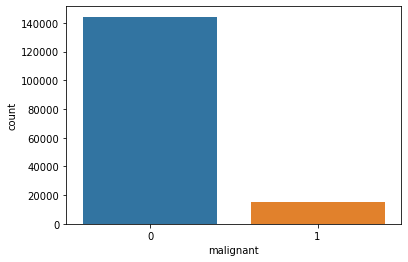

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


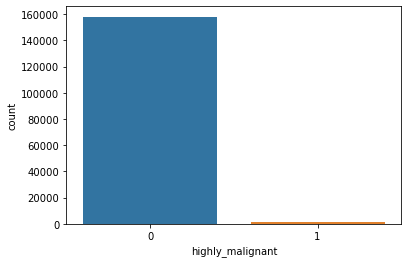

rude


0    151122
1      8449
Name: rude, dtype: int64


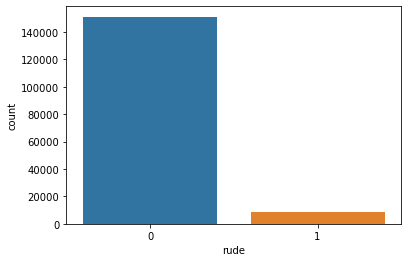

threat


0    159093
1       478
Name: threat, dtype: int64


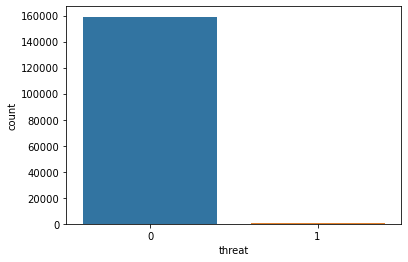

abuse


0    151694
1      7877
Name: abuse, dtype: int64


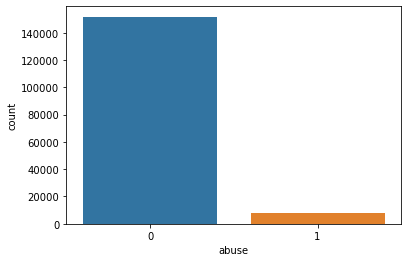

loathe


0    158166
1      1405
Name: loathe, dtype: int64


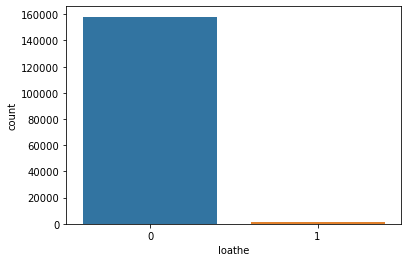

In [14]:
col=['malignant','highly_malignant','rude','threat','abuse','loathe']

for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

From the above observation we can see that, 15294 comments are malignant and 144277 comments are not malignant.
1595 comments are highly_malignant and 157976 comments are not highly_malignant.
8449 comments are rude and 151122 are not rude.
478 comments are threat and 159093 comments are not threat.
7877 comments are abuse and 151694 comments are not abuse.
1405 comments are loathe and 158166 comments are not loathe.

# Correlation:

In [15]:
train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


correlation using heatmap:

<AxesSubplot:>

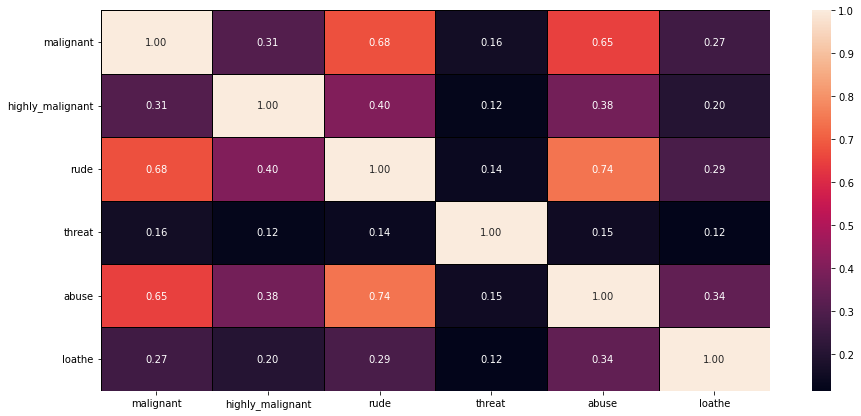

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

# Describing dataset:

In [17]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Describe of dataset using heatmap:

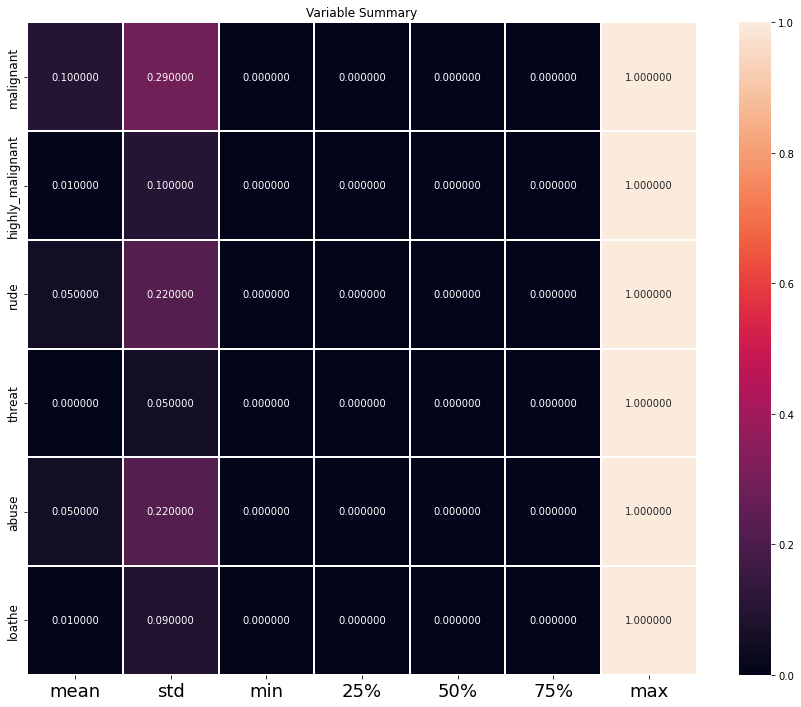

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(round(train.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

In [21]:
print(train.info())
print("\n")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


# Skewness:

In [36]:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

All the columns of the dataset has skewness.

# Normal Distribution Curve:

<AxesSubplot:xlabel='malignant', ylabel='Density'>

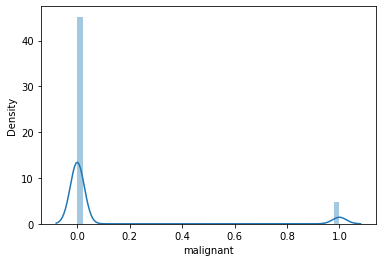

In [37]:
sns.distplot(train['malignant'])

The data of the column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='highly_malignant', ylabel='Density'>

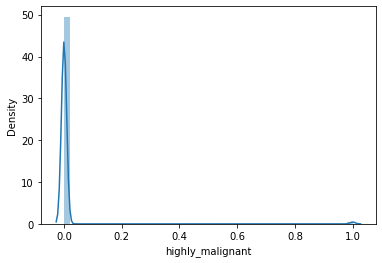

In [38]:
sns.distplot(train['highly_malignant'])

The data of the column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='rude', ylabel='Density'>

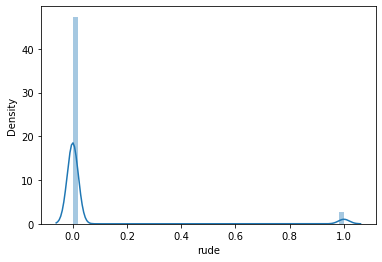

In [39]:
sns.distplot(train['rude'])

The data of the column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='threat', ylabel='Density'>

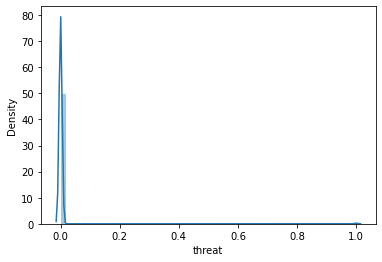

In [40]:
sns.distplot(train['threat'])

The data of the column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='abuse', ylabel='Density'>

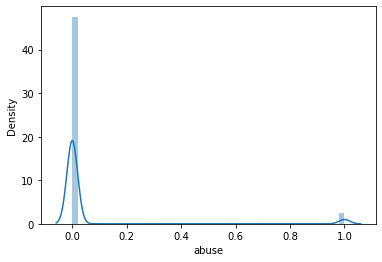

In [41]:
sns.distplot(train['abuse'])

The data of the column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='loathe', ylabel='Density'>

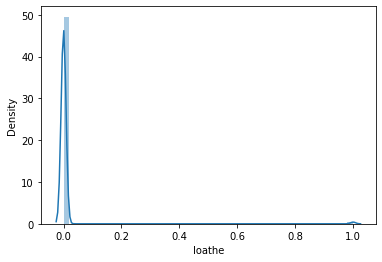

In [42]:
sns.distplot(train['loathe'])

The data of the column is not normalized. The building blocks is out of the normalized curve.

In [5]:
#importing necessary libraries

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [6]:
train['length']=train['comment_text'].str.len()
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [7]:
#convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

#Replace email address with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

#Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

#Replace money sumbols with 'moneysymb'
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollars')

#Replace 10 digit phone numbers with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

#Replace numbers with 'num'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'num')

train['comment_text'] = train['comment_text'].apply(lambda x: ''.join(term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u','ur','4','2','im','dont','doin','ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ''.join(term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ''.join(lem.lemmatize(t) for t in x.split()))


In [8]:
train['clean_length']=train.comment_text.str.len()
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanationwhytheeditsmadeundermyusernamehardc...,0,0,0,0,0,0,264,217
1,000103f0d9cfb60f,d'aww!hematchesthisbackgroundcolouri'mseemingl...,0,0,0,0,0,0,112,97
2,000113f07ec002fd,"heyman,i'mreallynottryingtoeditwar.it'sjusttha...",0,0,0,0,0,0,233,192
3,0001b41b1c6bb37e,moreican'tmakeanyrealsuggestionsonimprovementi...,0,0,0,0,0,0,622,503
4,0001d958c54c6e35,"you,sir,aremyhero.anychanceyourememberwhatpage...",0,0,0,0,0,0,67,55
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::andforthesecondtimeofasking,whenyourview...",0,0,0,0,0,0,295,243
159567,ffea4adeee384e90,youshouldbeashamedofyourselfthatisahorriblethi...,0,0,0,0,0,0,99,74
159568,ffee36eab5c267c9,"spitzerumm,theresnoactualarticleforprostitutio...",0,0,0,0,0,0,81,66
159569,fff125370e4aaaf3,anditlookslikeitwasactuallyyouwhoputonthespeed...,0,0,0,0,0,0,116,92


In [9]:
#total length removal
print('Original Length: ', train.length.sum())
print('Clean Length: ', train.clean_length.sum())

Original Length:  62893130
Clean Length:  51689054


In [10]:
#!pip install wordcloud

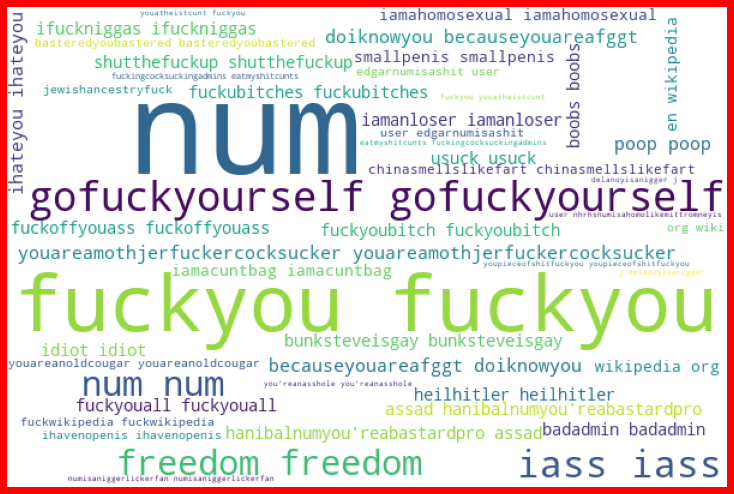

In [11]:
#offensive loud words
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600, height=400, background_color='white',max_words=50).generate(''.join(hams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [12]:
target_column=['malignant','highly_malignant','rude','threat','abuse','loathe']

target=train[target_column]

train['bad']=train[target_column].sum(axis=1)
print(train['bad'].value_counts())
train['bad']=train['bad']>0
train['bad']=train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


0    143346
1     16225
Name: bad, dtype: int64


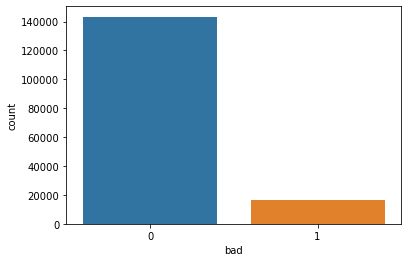

In [13]:
sns.countplot(x='bad', data=train)
print(train['bad'].value_counts())
plt.show()

In [14]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length,bad
0,0000997932d777bf,explanationwhytheeditsmadeundermyusernamehardc...,0,0,0,0,0,0,264,217,0
1,000103f0d9cfb60f,d'aww!hematchesthisbackgroundcolouri'mseemingl...,0,0,0,0,0,0,112,97,0
2,000113f07ec002fd,"heyman,i'mreallynottryingtoeditwar.it'sjusttha...",0,0,0,0,0,0,233,192,0
3,0001b41b1c6bb37e,moreican'tmakeanyrealsuggestionsonimprovementi...,0,0,0,0,0,0,622,503,0
4,0001d958c54c6e35,"you,sir,aremyhero.anychanceyourememberwhatpage...",0,0,0,0,0,0,67,55,0


In [15]:
#converting text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=10000, stop_words='english')
feature= tfidf.fit_transform(train['comment_text'])

In [16]:
print(train.shape)
print(test.shape)

(159571, 11)
(153164, 2)


# Dividing Dataframe into feature and target

In [17]:
x=feature
y=train['bad']

In [18]:
y.value_counts()

0    143346
1     16225
Name: bad, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(x,y)

In [20]:
ytrain.value_counts()

0    143346
1    143346
Name: bad, dtype: int64

# Model Building

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression:

In [29]:
lg=LogisticRegression()

train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=45)
lg.fit(train_x,train_y)
pred_train=lg.predict(train_x)
pred_test=lg.predict(test_x)

print("Training Accuracy:",accuracy_score(train_y,pred_train)*100)
print("Testing Accuracy:",accuracy_score(test_y,pred_test)*100)

Training Accuracy: 75.04632596913928
Testing Accuracy: 74.33858281448926


Cross Validation for logistic regression:

In [30]:
from sklearn.model_selection import cross_val_score

lg.fit(train_x,train_y)
lg.score(train_x,train_y)
pred_lg = lg.predict(test_x)

lss = accuracy_score(test_y,pred_lg)
for j in range(2,10):
    lsscore = cross_val_score(lg,xtrain,ytrain,cv=j)
    ls_cv = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",ls_cv*100 )
    print("Accuracy score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 73.79417632860353
Accuracy score is :- 74.33858281448926


At cv:- 3
Cross validation score is:- 74.07810472562892
Accuracy score is :- 74.33858281448926


At cv:- 4
Cross validation score is:- 74.19181560699288
Accuracy score is :- 74.33858281448926


At cv:- 5
Cross validation score is:- 74.27936787155284
Accuracy score is :- 74.33858281448926


At cv:- 6
Cross validation score is:- 74.29471349043574
Accuracy score is :- 74.33858281448926


At cv:- 7
Cross validation score is:- 74.30831693943325
Accuracy score is :- 74.33858281448926


At cv:- 8
Cross validation score is:- 74.3219213810925
Accuracy score is :- 74.33858281448926


At cv:- 9
Cross validation score is:- 74.33099030511153
Accuracy score is :- 74.33858281448926




In [31]:
print("At cv:",9)
print("Cross validation score is:",74.33099030511153)
print("Accuracy score is :",74.33858281448926)

At cv: 9
Cross validation score is: 74.33099030511153
Accuracy score is : 74.33858281448926


AUC-ROC Curve:

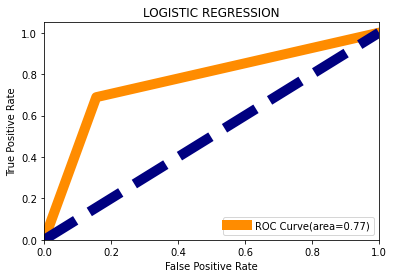

In [32]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_lg,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOGISTIC REGRESSION')
plt.legend(loc="lower right")
plt.show()

# Approaching more classifiers:

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# 1.Decision Tree Classifier:

In [34]:
parameters = {'criterion':['gini', 'entropy'],'splitter':['best','random']}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'gini', 'splitter': 'best'}


In [36]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
pred_dtc = dtc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_dtc)*100)
print("Classification report:",classification_report(test_y,pred_dtc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_dtc)*100)

dtc_score = cross_val_score(dtc,xtrain,ytrain,cv=9)
dtc_cc = dtc_score.mean() 
print('Cross Val Score:',dtc_cc*100)

Accuracy Score: 77.23538952545388
Classification report:               precision    recall  f1-score   support

           0       0.91      0.61      0.73     28576
           1       0.71      0.94      0.81     28763

    accuracy                           0.77     57339
   macro avg       0.81      0.77      0.77     57339
weighted avg       0.81      0.77      0.77     57339
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     28576
           1       0.71      0.94      0.81     28763

    accuracy                           0.77     57339
   macro avg       0.81      0.77      0.77     57339
weighted avg       0.81      0.77      0.77     57339
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     28576
           1       0.71      0.94      0.81     28763

    accuracy                           0.77     57339
   macro avg       0.81      0.77      0.77     57339
weighted avg       

AUC-ROC Curve:

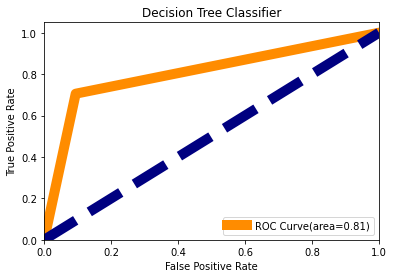

In [37]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_dtc,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# 2.KNeighbors Classifier:

In [38]:
parameters = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'auto'}


In [39]:
knc = KNeighborsClassifier(algorithm='auto', n_neighbors=5)
knc.fit(train_x,train_y)
knc.score(train_x,train_y)
pred_knc = knc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_knc)*100)
print("Classification report:",classification_report(test_y,pred_knc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_knc)*100)

knc_score = cross_val_score(knc,xtrain,ytrain,cv=9)
knc_cc = knc_score.mean() 
print('Cross Val Score:',knc_cc*100)

Accuracy Score: 60.55389874256613
Classification report:               precision    recall  f1-score   support

           0       0.58      0.76      0.66     28576
           1       0.66      0.45      0.53     28763

    accuracy                           0.61     57339
   macro avg       0.62      0.61      0.60     57339
weighted avg       0.62      0.61      0.60     57339
              precision    recall  f1-score   support

           0       0.58      0.76      0.66     28576
           1       0.66      0.45      0.53     28763

    accuracy                           0.61     57339
   macro avg       0.62      0.61      0.60     57339
weighted avg       0.62      0.61      0.60     57339
              precision    recall  f1-score   support

           0       0.58      0.76      0.66     28576
           1       0.66      0.45      0.53     28763

    accuracy                           0.61     57339
   macro avg       0.62      0.61      0.60     57339
weighted avg       

AUC-ROC Curve:

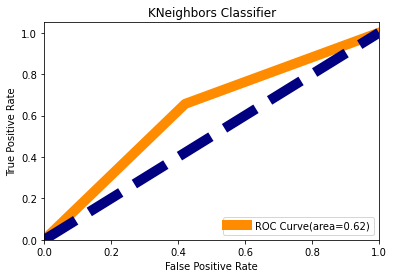

In [40]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_knc,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeighbors Classifier')
plt.legend(loc="lower right")
plt.show()

# ENSEMBLE METHODS:

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1.Random Forest Classifier:

In [42]:
parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 100}


In [43]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=100)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)
pred_rfc = rfc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_rfc)*100)
print("Classification report:",classification_report(test_y,pred_rfc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_rfc)*100)

rfc_score = cross_val_score(rfc,xtrain,ytrain,cv=9)
rfc_cc = rfc_score.mean() 
print('Cross Val Score:',rfc_cc*100)

Accuracy Score: 77.93822703569995
Classification report:               precision    recall  f1-score   support

           0       0.93      0.61      0.73     28576
           1       0.71      0.95      0.81     28763

    accuracy                           0.78     57339
   macro avg       0.82      0.78      0.77     57339
weighted avg       0.82      0.78      0.77     57339
              precision    recall  f1-score   support

           0       0.93      0.61      0.73     28576
           1       0.71      0.95      0.81     28763

    accuracy                           0.78     57339
   macro avg       0.82      0.78      0.77     57339
weighted avg       0.82      0.78      0.77     57339
              precision    recall  f1-score   support

           0       0.93      0.61      0.73     28576
           1       0.71      0.95      0.81     28763

    accuracy                           0.78     57339
   macro avg       0.82      0.78      0.77     57339
weighted avg       

AUC-ROC Curve

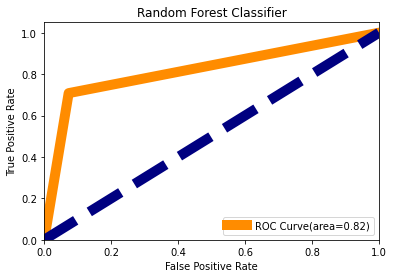

In [44]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_rfc,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# 2.Ada Boost Classifier:

In [45]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME')
abc.fit(train_x,train_y)
abc.score(train_x,train_y)
pred_abc = abc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_abc)*100)
print("Classification report:",classification_report(test_y,pred_abc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_abc)*100)

abc_score = cross_val_score(abc,xtrain,ytrain,cv=9)
abc_cc = abc_score.mean() 
print('Cross Val Score:',abc_cc*100)

Accuracy Score: 56.642076073876424
Classification report:               precision    recall  f1-score   support

           0       0.84      0.16      0.27     28576
           1       0.54      0.97      0.69     28763

    accuracy                           0.57     57339
   macro avg       0.69      0.57      0.48     57339
weighted avg       0.69      0.57      0.48     57339
              precision    recall  f1-score   support

           0       0.84      0.16      0.27     28576
           1       0.54      0.97      0.69     28763

    accuracy                           0.57     57339
   macro avg       0.69      0.57      0.48     57339
weighted avg       0.69      0.57      0.48     57339
              precision    recall  f1-score   support

           0       0.84      0.16      0.27     28576
           1       0.54      0.97      0.69     28763

    accuracy                           0.57     57339
   macro avg       0.69      0.57      0.48     57339
weighted avg      

AUC-ROC Curve

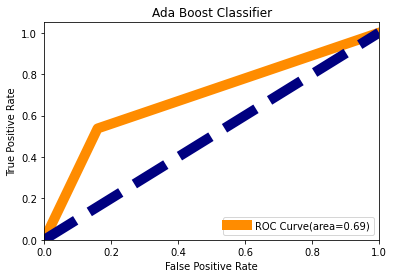

In [46]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_abc,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ada Boost Classifier')
plt.legend(loc="lower right")
plt.show()

# 3.Gradient Boosting Classifier:

In [47]:
gbc = GradientBoostingClassifier(criterion='mse', n_estimators=100, learning_rate=0.1, loss='deviance')
gbc.fit(train_x,train_y)
gbc.score(train_x,train_y)
pred_gbc = gbc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_gbc)*100)
print("Classification report:",classification_report(test_y,pred_gbc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_gbc)*100)

gbc_score = cross_val_score(gbc,xtrain,ytrain,cv=9)
gbc_cc = gbc_score.mean() 
print('Cross Val Score:',gbc_cc*100)

Accuracy Score: 63.346064633146725
Classification report:               precision    recall  f1-score   support

           0       0.79      0.36      0.49     28576
           1       0.59      0.91      0.71     28763

    accuracy                           0.63     57339
   macro avg       0.69      0.63      0.60     57339
weighted avg       0.69      0.63      0.60     57339
              precision    recall  f1-score   support

           0       0.79      0.36      0.49     28576
           1       0.59      0.91      0.71     28763

    accuracy                           0.63     57339
   macro avg       0.69      0.63      0.60     57339
weighted avg       0.69      0.63      0.60     57339
              precision    recall  f1-score   support

           0       0.79      0.36      0.49     28576
           1       0.59      0.91      0.71     28763

    accuracy                           0.63     57339
   macro avg       0.69      0.63      0.60     57339
weighted avg      

AUC-ROC Curve:

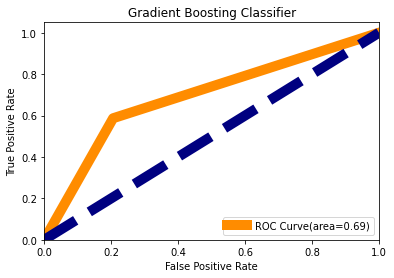

In [48]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_gbc,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

# XGBOOST:

In [50]:
#!pip install xgboost

In [51]:
import xgboost

xgb = xgboost.XGBClassifier()
xgb.fit(train_x,train_y)
xgb.score(train_x,train_y)
pred_xgb = xgb.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_xgb)*100)
print("Classification report:",classification_report(test_y,pred_xgb)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_xgb)*100)

xgb_score = cross_val_score(xgb,xtrain,ytrain,cv=9)
xgb_cc = gbc_score.mean() 
print('Cross Val Score:',xgb_cc*100)

[18:40:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 67.83515582762169
Classification report:               precision    recall  f1-score   support

           0       0.84      0.44      0.58     28576
           1       0.62      0.91      0.74     28763

    accuracy                           0.68     57339
   macro avg       0.73      0.68      0.66     57339
weighted avg       0.73      0.68      0.66     57339
              precision    recall  f1-score   support

           0       0.84      0.44      0.58     28576
           1       0.62      0.91      0.74     28763

    accuracy                           0.68     57339
   macro avg       0.73      0.68      0.66     57339
weighted avg       0.73      0.68  

AUC-ROC Curve:

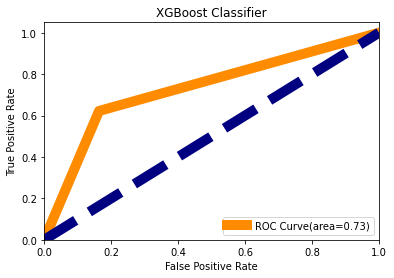

In [52]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_xgb,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# The best model is Random Forest Classifier. Since the difference between the percentage score of cross validation,accuracy_score and ROC Curve is optimum.

# Model Saving:

In [55]:
import pickle
filename='malign-comment.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Coclusion:

In [56]:
import numpy as np
a=np.array(test_y)
predicted=np.array(rfc.predict(test_x))
mal_con=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
mal_con

,original,predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
57334,1,1
57335,1,1
57336,1,1
57337,1,1


From the above table, the model is predicted with 78 percent accuracy.


In [57]:
#Converting test dataset into vector

test1=tfidf.fit_transform(test['comment_text'])
test1

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [58]:
#predicting test dataset using chosen model

pred = rfc.predict(test1)
pred

array([1, 0, 0, ..., 1, 1, 0])

In [59]:
#creating dataset with predicted output

test['Predicted Output'] = pred
test

,id,comment_text,Predicted Output
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0
4,00017695ad8997eb,I don't anonymously edit articles at all.,1
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",1
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,1
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",1
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",1


In [65]:
#converting into csv file

test.to_csv('Test.csv', index = False)

In [67]:
#downloading the csv file

test.to_csv(r'C:\Users\DELL\Downloads\Test.csv')